In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load data

In [2]:
df = pd.read_csv('cip_dataset_v2.csv')
df['date'] = pd.to_datetime(df['date'], format='%d%b%Y')
df.set_index('date', inplace=True)

In [3]:
unique_tenors = df['tenor'].unique()
unique_tenors

array(['10y', '1y', '2y', '3m', '3y', '5y', '7y'], dtype=object)

# Pick Tenor

In [4]:
tenor_to_use = '5y'

In [5]:
df = df[df['tenor'] == tenor_to_use]

In [6]:
cip_df = df.reset_index().pivot(columns='currency', values='cip_govt', index='date')
cip_df = cip_df[~(cip_df.isna().any(axis=1))]

# Plot CIP data

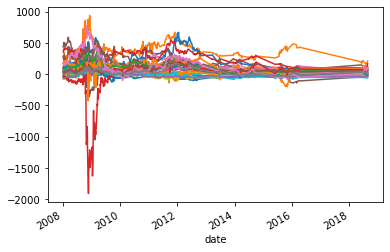

In [7]:
cip_df.plot(legend=False);

# PCA

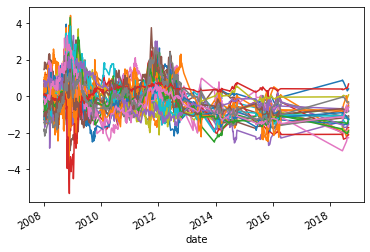

In [8]:
normalised_cip_df = (cip_df - cip_df.mean())/cip_df.std()
normalised_cip_df.plot(legend=False);

In [9]:
pca = PCA().fit(normalised_cip_df)
pca_df = pd.DataFrame(pca.components_, columns=normalised_cip_df.columns).loc[0:2].round(3)
pca_df.index = ['pc1', 'pc2', 'pc3']

pca_df.loc['type'] = df.groupby('currency')['group'].last()

pca_df

currency,AUD,BRL,CAD,CHF,CLP,CNY,COP,DKK,EUR,GBP,...,NOK,NZD,PEN,PHP,PLN,RUB,SEK,THB,TRY,ZAR
pc1,0.153,0.199,0.257,0.238,0.208,-0.107,0.161,0.228,0.222,0.211,...,0.159,0.223,0.186,0.026,0.256,-0.2,0.165,0.067,0.251,0.147
pc2,-0.268,0.145,-0.13,0.124,0.024,0.078,0.172,-0.184,-0.17,-0.129,...,-0.305,-0.091,0.132,0.228,0.087,0.171,-0.3,0.339,-0.001,0.298
pc3,0.032,0.187,-0.01,0.09,-0.281,-0.46,0.009,0.067,-0.113,-0.009,...,0.094,0.059,-0.213,-0.155,0.026,-0.168,-0.104,-0.013,-0.077,0.149
type,g10,eme,g10,g10,eme,eme,eme,g10,g10,g10,...,g10,g10,eme,eme,eme,eme,g10,eme,eme,eme


# Plot PCA

In [10]:
order_df = df[df['tenor']==tenor_to_use][['group', 'currency', 'cip_govt']].groupby(['group', 'currency']).mean()
order_df = order_df.sort_values(['group', 'cip_govt'])
country_order = order_df.index.get_level_values(1)
country_order

Index(['RUB', 'ZAR', 'PEN', 'MXN', 'IDR', 'CLP', 'THB', 'ILS', 'PLN', 'PHP',
       'TRY', 'MYR', 'CNY', 'COP', 'KRW', 'INR', 'HUF', 'BRL', 'NZD', 'AUD',
       'NOK', 'SEK', 'CAD', 'GBP', 'EUR', 'DKK', 'CHF', 'JPY'],
      dtype='object', name='currency')

In [11]:
pca_df = pca_df[country_order]

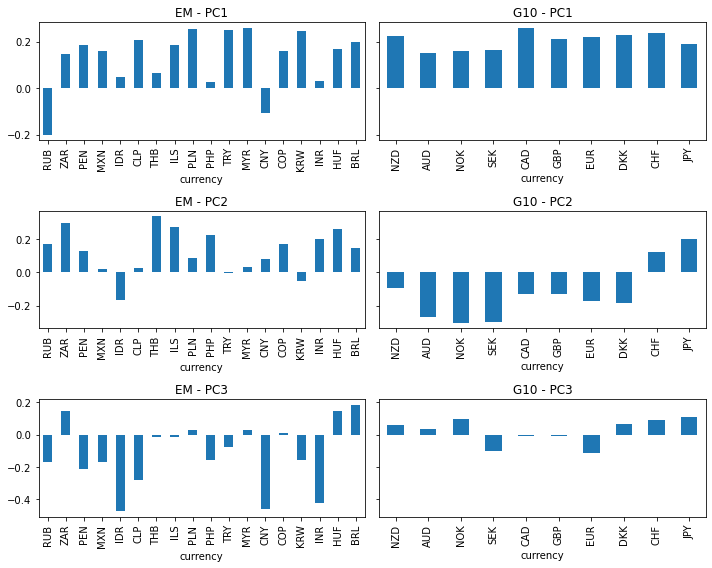

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 8), sharey='row')

pca_df.T[pca_df.T['type'] == 'eme'][['pc1']].plot.bar(ax=ax[0, 0], title='EM - PC1', legend=False)
pca_df.T[pca_df.T['type'] == 'g10'][['pc1']].plot.bar(ax=ax[0, 1], title='G10 - PC1', legend=False)

pca_df.T[pca_df.T['type'] == 'eme'][['pc2']].plot.bar(ax=ax[1, 0], title='EM - PC2', legend=False)
pca_df.T[pca_df.T['type'] == 'g10'][['pc2']].plot.bar(ax=ax[1, 1], title='G10 - PC2', legend=False)

pca_df.T[pca_df.T['type'] == 'eme'][['pc3']].plot.bar(ax=ax[2, 0], title='EM - PC3', legend=False)
pca_df.T[pca_df.T['type'] == 'g10'][['pc3']].plot.bar(ax=ax[2, 1], title='G10 - PC3', legend=False)

plt.tight_layout()

In [20]:
variance_explained = np.round((pca.explained_variance_ / pca.explained_variance_.sum()) * 100, 3)
variance_explained[0], variance_explained[1], variance_explained[2], variance_explained[3]

(43.536, 21.419, 9.823, 5.324)